# Analysis of Colombia's tradidional and non-traditional exports

**Last edit:** May 9, 2018

**Data sources:**
- DANE - Export (USD FOB) data: http://www.dane.gov.co/index.php/estadisticas-por-tema/comercio-internacional/exportaciones
- Banco de la Repulica - COP/USD exchange rate: http://www.banrep.gov.co/es/trm
- Quandl - OPEC Crude Oil Prices: https://www.quandl.com/data/OPEC/ORB-OPEC-Crude-Oil-Price

In [1]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import MonthEnd

In [2]:
data = pd.read_excel('data/clean_data.xlsx')
data['Date'] = pd.to_datetime(data['Date'], format="%Y%m") + MonthEnd(0)
data.set_index("Date", inplace=True)
data.head()

,Coffee,Coal,Petroleum and derivatives,Iron-nickel alloy,Non-traditional,COP/USD
Date,,,,,,
1992-01-31,108864.259,39350.417,130960.007,2580.274,250016.024,644.27
1992-02-29,114798.508,56115.593,102964.170,17022.567,282102.924,636.54
1992-03-31,89464.459,11971.475,139097.847,6689.358,305083.814,641.59
1992-04-30,113534.579,54218.066,123237.049,2159.911,238675.349,653.83
1992-05-31,118169.773,36988.960,126696.237,20405.646,326456.530,664.37


In [3]:
data.dtypes

Coffee                       float64
Coal                         float64
Petroleum and derivatives    float64
Iron-nickel alloy            float64
Non-traditional              float64
COP/USD                      float64
dtype: object

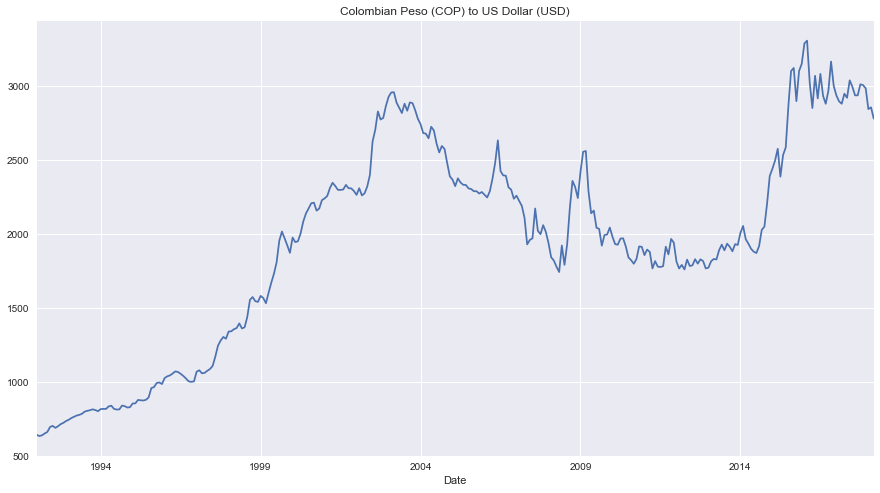

In [4]:
data["COP/USD"].plot(figsize=(15,8), title="Colombian Peso (COP) to US Dollar (USD)");

In [5]:
data.corr()

,Coffee,Coal,Petroleum and derivatives,Iron-nickel alloy,Non-traditional,COP/USD
Coffee,1.000000,0.511666,0.437960,0.117135,0.442476,0.019306
Coal,0.511666,1.000000,0.828150,0.436309,0.846294,0.366766
Petroleum and derivatives,0.437960,0.828150,1.000000,0.359235,0.794504,0.201982
Iron-nickel alloy,0.117135,0.436309,0.359235,1.000000,0.592642,0.238468
Non-traditional,0.442476,0.846294,0.794504,0.592642,1.000000,0.476095
COP/USD,0.019306,0.366766,0.201982,0.238468,0.476095,1.000000


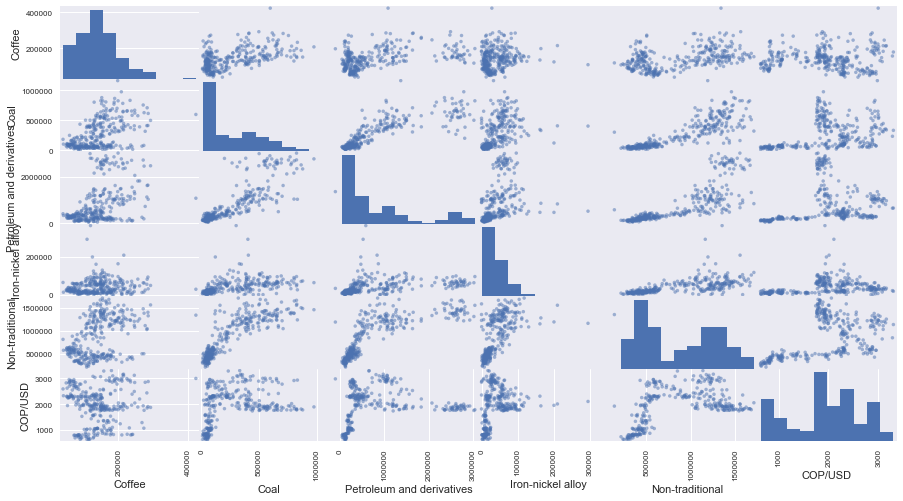

In [12]:
pd.plotting.scatter_matrix(data, figsize=(15, 8));

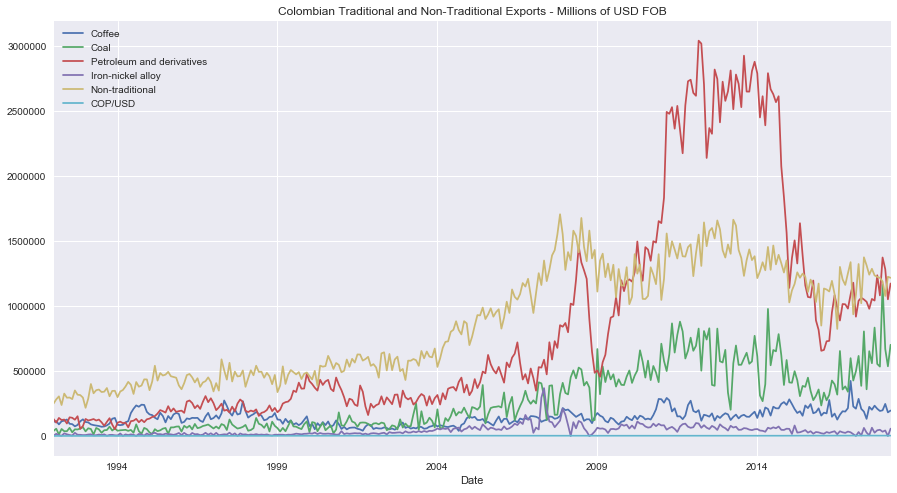

In [6]:
data.plot(figsize=(15,8),
          title="Colombian Traditional and Non-Traditional Exports - Millions of USD FOB");

In [7]:
# Resample data on a yearly basis
data_year = data.resample('A').sum()
data_year.head()

,Coffee,Coal,Petroleum and derivatives,Iron-nickel alloy,Non-traditional,COP/USD
Date,,,,,,
1992-12-31,1258847.635,555430.317,1412943.112,125155.602,3557257.025,8218.11
1993-12-31,1139868.207,564414.210,1323259.641,101897.978,3994006.519,9464.25
1994-12-31,1990133.872,549833.317,1312722.928,118782.684,4566055.228,9927.98
1995-12-31,1831894.307,592538.808,2184679.906,184786.031,5407165.419,11034.03
1996-12-31,1578430.590,848553.528,2947002.505,172073.561,5101504.021,12452.58


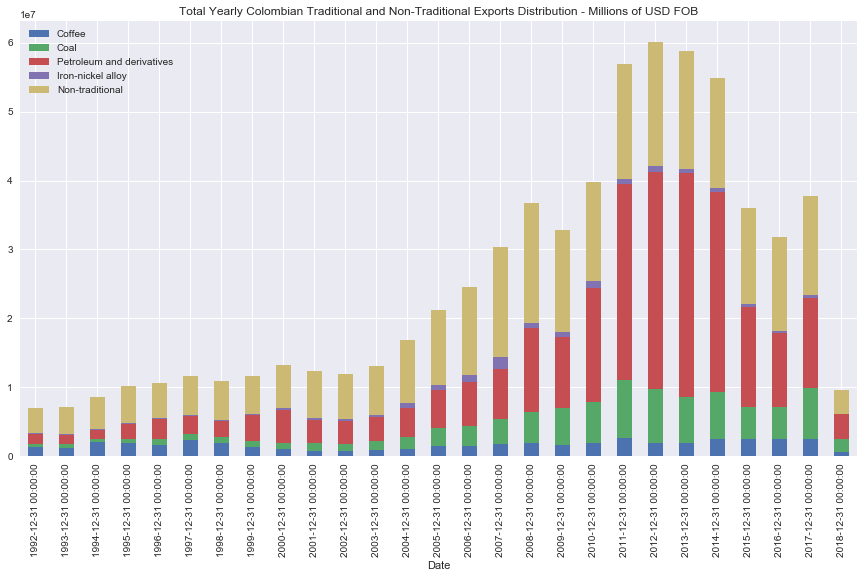

In [8]:
data_year.iloc[:,:-1].plot(kind='bar', stacked=True, figsize=(15,8), legend=True, 
                           title="Total Yearly Colombian Traditional and Non-Traditional Exports Distribution - Millions of USD FOB");



In [9]:
# Percentage change per month
data_z = data.pct_change()
data_z.head()

,Coffee,Coal,Petroleum and derivatives,Iron-nickel alloy,Non-traditional,COP/USD
Date,,,,,,
1992-01-31,NaN,NaN,NaN,NaN,NaN,NaN
1992-02-29,0.054511,0.426048,-0.213774,5.597194,0.128339,-0.011998
1992-03-31,-0.220683,-0.786664,0.350934,-0.607030,0.081463,0.007934
1992-04-30,0.269047,3.528938,-0.114026,-0.677112,-0.217673,0.019078
1992-05-31,0.040826,-0.317774,0.028069,8.447448,0.367785,0.016120


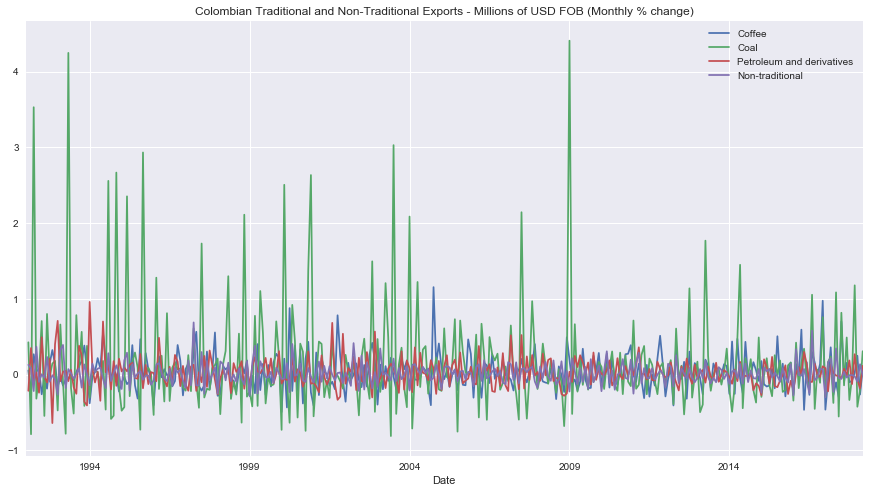

In [10]:
data_z.loc[:,["Coffee", "Coal", "Petroleum and derivatives", "Non-traditional"]].plot(figsize=(15,8), 
           title="Colombian Traditional and Non-Traditional Exports - Millions of USD FOB (Monthly % change)");

In [11]:
# Cumulative change since inception (Jan, 2003)
data_c = data.loc["2003-01-31":,:].apply(lambda x: (x - x[0]) / x[0])
data_c.head()

,Coffee,Coal,Petroleum and derivatives,Iron-nickel alloy,Non-traditional,COP/USD
Date,,,,,,
2003-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2003-02-28,0.132858,-0.228884,-0.052994,-0.264798,0.344663,0.010200
2003-03-31,-0.085917,-0.207771,-0.010091,-0.252099,0.343894,0.010863
2003-04-30,0.016260,0.748570,-0.186456,-0.028857,0.374049,-0.013204
2003-05-31,-0.068221,1.608847,-0.121730,-0.201797,0.352237,-0.024989


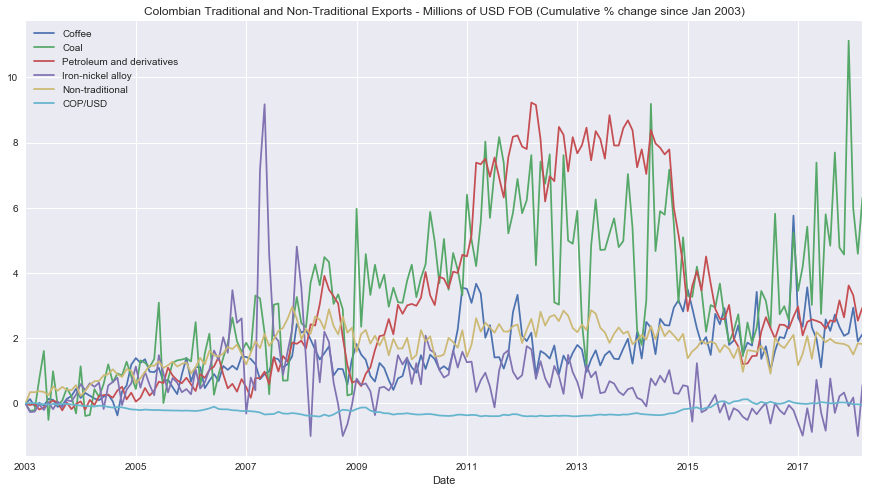

In [13]:
data_c.plot(figsize=(15,8), 
           title="Colombian Traditional and Non-Traditional Exports - Millions of USD FOB (Cumulative % change since Jan 2003)");

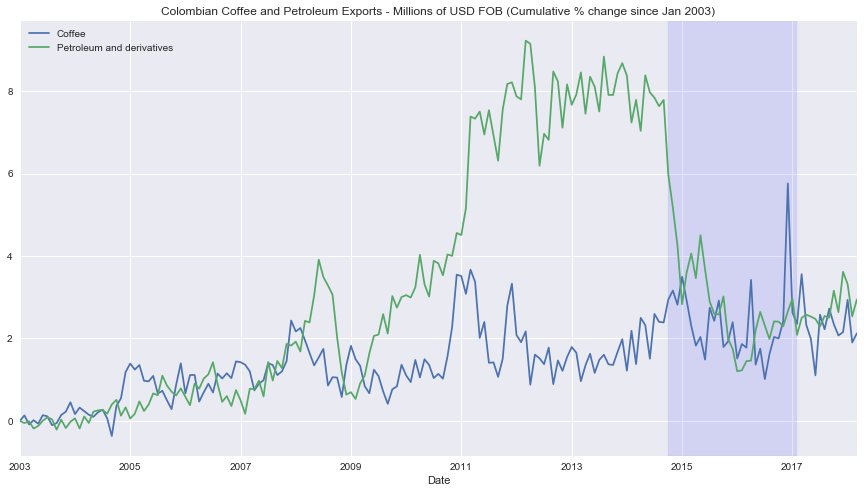

In [14]:
data_c.loc[:,["Coffee", "Petroleum and derivatives"]].plot(figsize=(15,8), legend=True,
                                                                     title="Colombian Coffee and Petroleum Exports - Millions of USD FOB (Cumulative % change since Jan 2003)");

plt.axvspan("2014-10", "2017-02", color='b', alpha=0.1)

In [15]:
opec = pd.read_csv("data/OPEC-ORB.csv", index_col=0, parse_dates=True)
opec.columns = ["OPEC Crude Oil Price"]
opec.sort_index(ascending=True, inplace=True)
opec.head()

,OPEC Crude Oil Price
Date,
2003-01-31,30.71
2003-02-28,32.63
2003-03-31,27.22
2003-04-30,23.72
2003-05-31,26.71


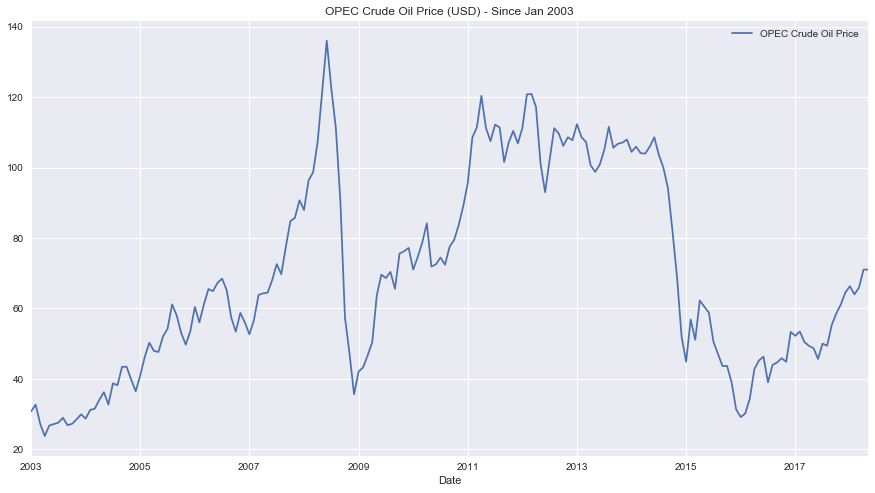

In [16]:
opec.plot(figsize=(15,8), title="OPEC Crude Oil Price (USD) - Since Jan 2003");

In [17]:
# Cumulative change since inception (Jan 1, 2000)
opec_c = opec.apply(lambda x: (x - x[0]) / x[0])
opec_c.tail()

,OPEC Crude Oil Price
Date,
2018-01-31,1.158255
2018-02-28,1.083035
2018-03-31,1.144904
2018-04-30,1.312276
2018-05-31,1.311625


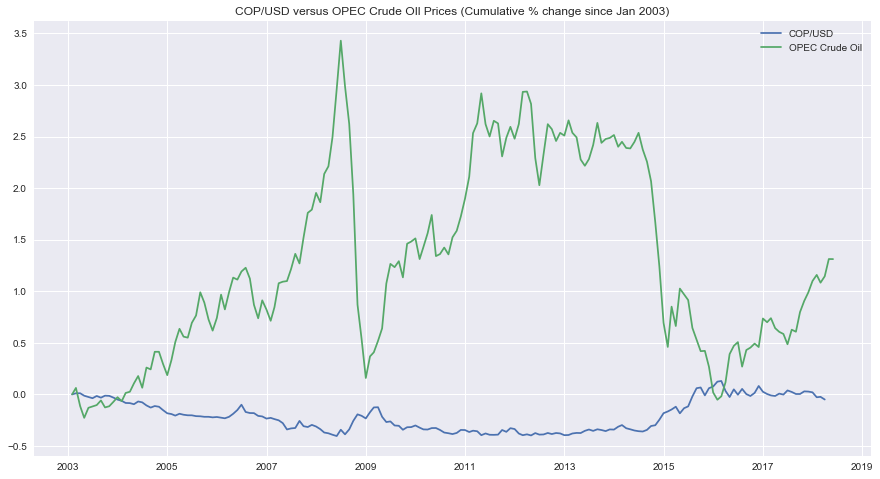

In [18]:
plt.figure(figsize=(15,8))
plt.plot(data_c["COP/USD"])
plt.plot(opec_c)
plt.legend(["COP/USD", "OPEC Crude Oil"])
plt.title("COP/USD versus OPEC Crude OIl Prices (Cumulative % change since Jan 2003)");

In [19]:
x = data_c["COP/USD"]
y = opec_c["OPEC Crude Oil Price"][:-2]
np.corrcoef(x,y)

array([[ 1.        , -0.83469716],
       [-0.83469716,  1.        ]])

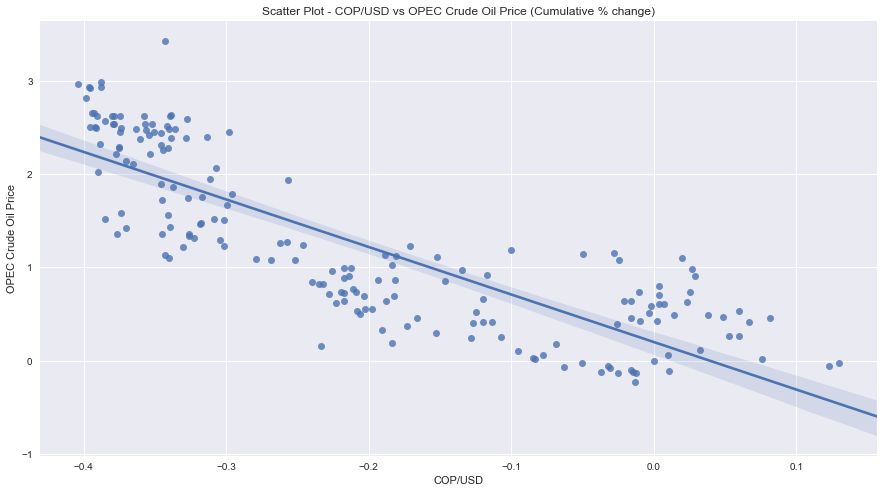

In [20]:
plt.figure(figsize=(15,8))
sns.regplot(x, y)
plt.title("Scatter Plot - COP/USD vs OPEC Crude Oil Price (Cumulative % change)");

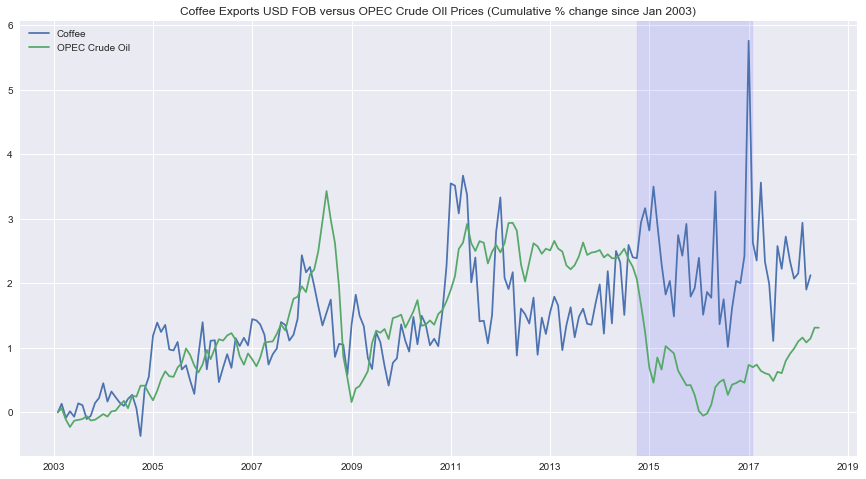

In [21]:
plt.figure(figsize=(15,8))
plt.plot(data_c["Coffee"])
plt.plot(opec_c)
plt.legend(["Coffee", "OPEC Crude Oil"])
plt.axvspan("2014-10", "2017-02", color='b', alpha=0.1)
plt.title("Coffee Exports USD FOB versus OPEC Crude OIl Prices (Cumulative % change since Jan 2003)");

In [22]:
x = data_c["Coffee"]
y = opec_c["OPEC Crude Oil Price"][:-2]
np.corrcoef(x,y)

array([[ 1.        ,  0.32075246],
       [ 0.32075246,  1.        ]])

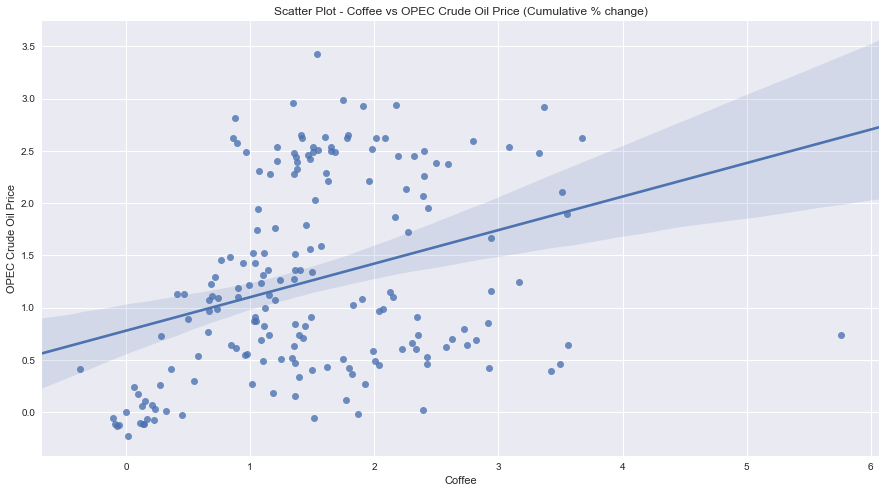

In [23]:
plt.figure(figsize=(15,8))
sns.regplot(x, y)
plt.title("Scatter Plot - Coffee vs OPEC Crude Oil Price (Cumulative % change)");